In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [9]:
## Test model
# PATH_TO_GRAPH = r'fine_tuned/rcnn_resnet101/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'fine_tuned/ssd/frozen_inference_graph.pb'
PATH_TO_GRAPH = r'fine_tuned/rcnn/frozen_inference_graph.pb'
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 13

In [10]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [11]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [12]:
# PATH_TO_IMGS = r'data/dataset_test_rgb/rgb/test/jpeg'
PATH_TO_IMGS = r'data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
IMAGE_SIZE = (12, 8)
random.shuffle(TEST_IMGS)

SCORES
[9.9850333e-01 2.2394525e-02 1.0951725e-02 8.6738048e-03 4.6211071e-03
 2.0774889e-03 6.7415647e-04 5.3514674e-04 7.7008903e-05 1.4082005e-05]
CLASSES
[1. 2. 3. 4. 4. 4. 4. 4. 4. 4.]


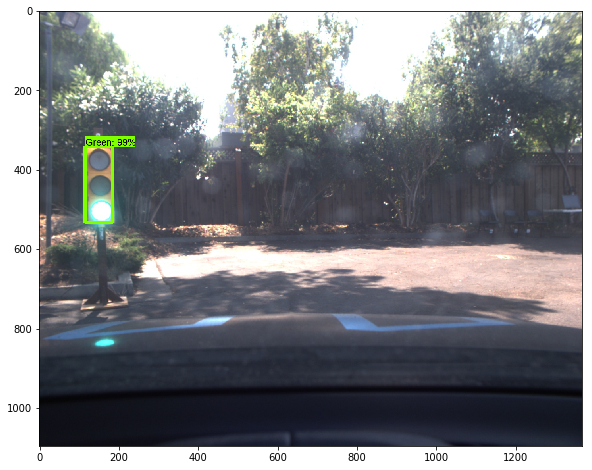

SCORES
[9.8623210e-01 3.7576720e-02 2.2773210e-02 1.2986338e-02 4.0634023e-03
 3.4800551e-03 1.3269128e-03 1.2479065e-03 2.3900706e-04 5.2495772e-05]
CLASSES
[1. 2. 3. 4. 4. 4. 4. 4. 4. 4.]


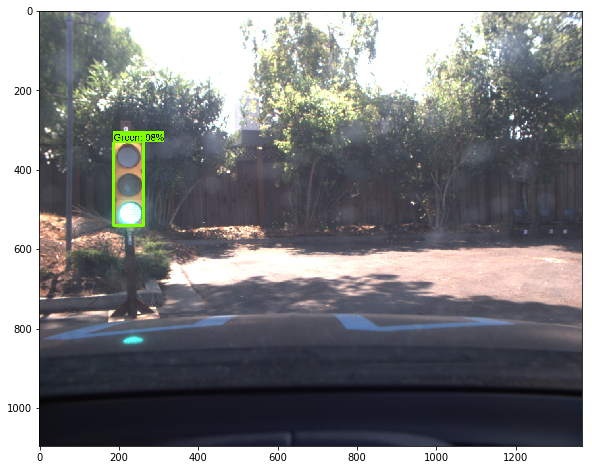

SCORES
[9.2565036e-01 3.4753236e-01 3.4330815e-02 1.0317510e-02 8.6364895e-03
 7.5943903e-03 1.2459520e-03 6.5958855e-04 6.2369281e-07 3.0452583e-08]
CLASSES
[2. 1. 3. 4. 4. 4. 4. 4. 4. 4.]


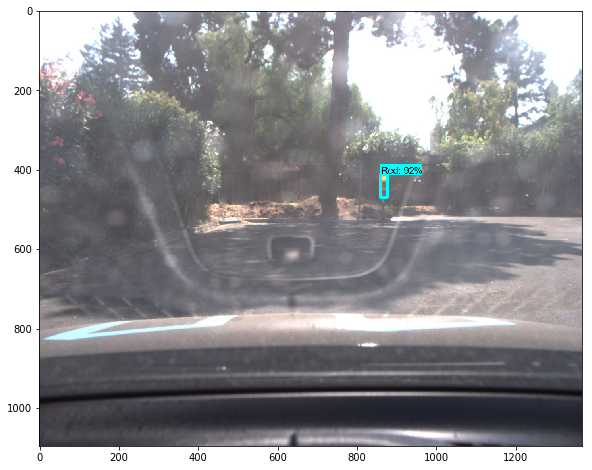

SCORES
[9.9884230e-01 9.9434346e-02 1.5417713e-02 9.5576178e-03 7.9048295e-03
 2.0588713e-03 1.9471627e-03 1.5543289e-03 6.2240876e-04 5.9992756e-04]
CLASSES
[1. 1. 2. 3. 4. 4. 3. 2. 4. 4.]


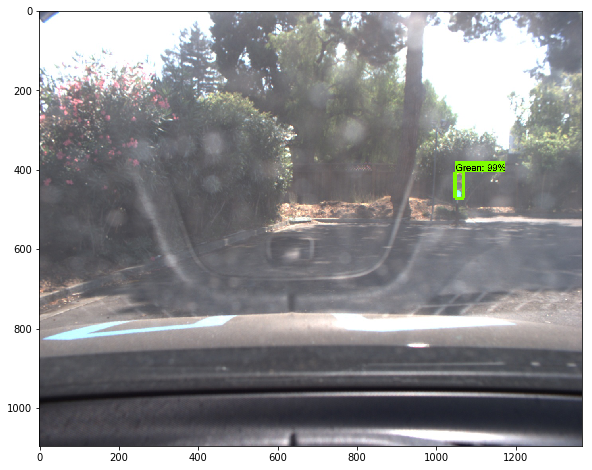

SCORES
[0.9911424  0.05051938 0.01571438 0.01130941 0.00954079 0.00316003
 0.00298709 0.00211079 0.00189372 0.00163063]
CLASSES
[1. 2. 3. 4. 3. 4. 4. 4. 4. 4.]


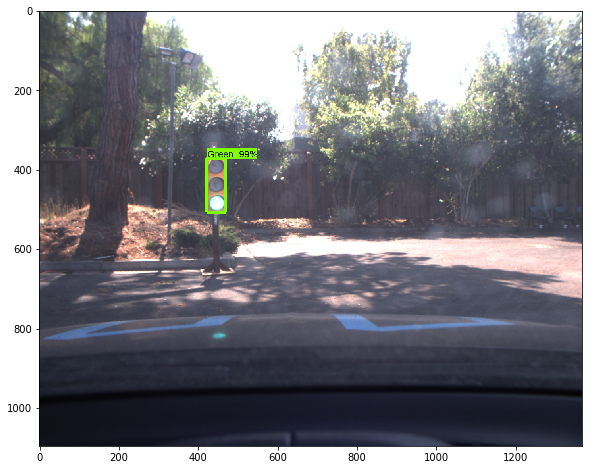

SCORES
[8.1514972e-01 4.1595954e-01 2.1226360e-02 6.7638201e-03 2.5982510e-03
 1.3032057e-03 4.6607235e-04 1.2423325e-09 7.2413245e-13 3.2654088e-13]
CLASSES
[2. 1. 3. 4. 4. 4. 4. 4. 1. 1.]


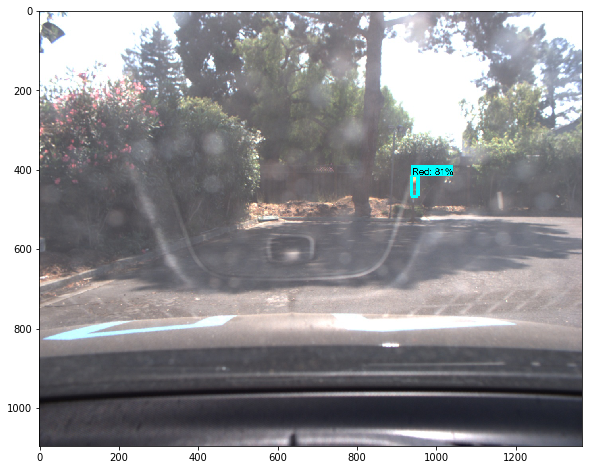

SCORES
[6.3986772e-01 5.3412503e-01 6.5622702e-02 1.4397811e-02 5.7673198e-03
 5.7307607e-03 1.0152883e-06 3.9689382e-08 3.7751580e-08 1.8560680e-08]
CLASSES
[2. 1. 3. 4. 4. 4. 1. 2. 4. 3.]


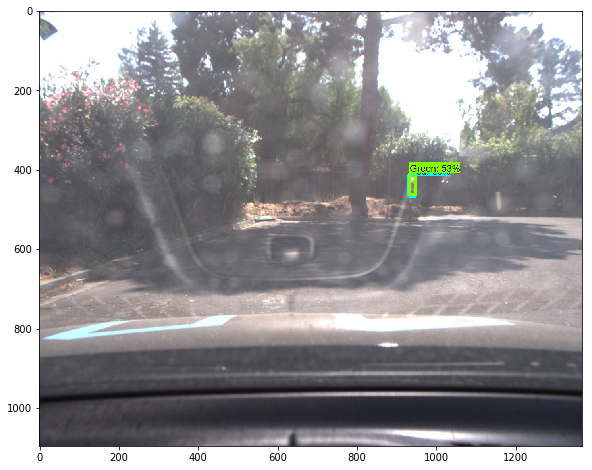

SCORES
[0.9911424  0.05051938 0.01571438 0.01130941 0.00954079 0.00316003
 0.00298709 0.00211079 0.00189372 0.00163063]
CLASSES
[1. 2. 3. 4. 3. 4. 4. 4. 4. 4.]


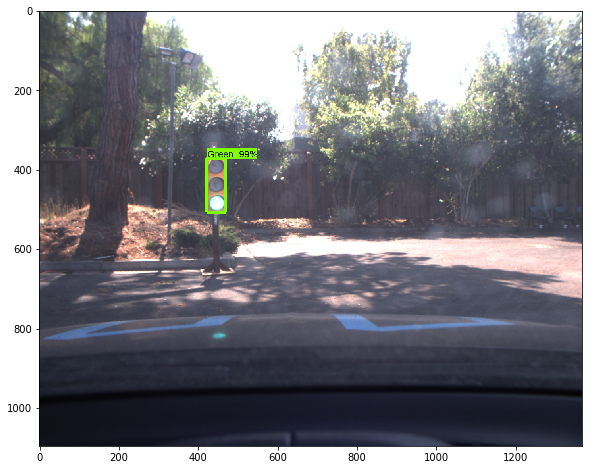

SCORES
[9.9984932e-01 4.2389659e-03 3.5470801e-03 2.3874708e-03 7.8638428e-04
 5.1541551e-04 3.7593063e-04 3.2558385e-04 1.9625927e-04 1.1806893e-04]
CLASSES
[2. 1. 3. 4. 4. 4. 4. 4. 4. 4.]


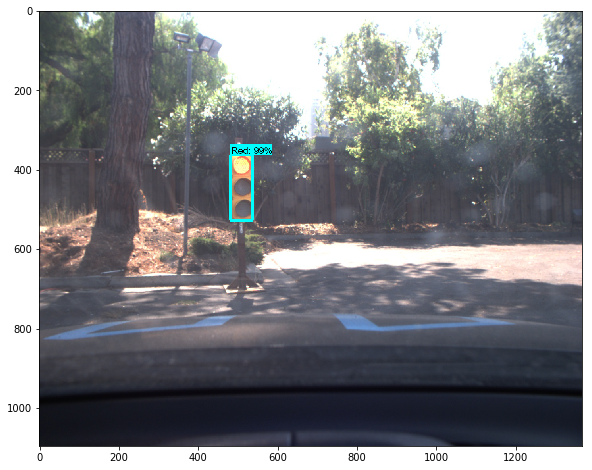

SCORES
[9.9817872e-01 7.1449415e-03 2.2697710e-03 1.5699497e-03 6.9904013e-04
 6.5862475e-04 3.9399878e-04 1.7758404e-04 3.6247333e-05 1.5264101e-05]
CLASSES
[2. 1. 4. 3. 4. 4. 4. 4. 4. 4.]


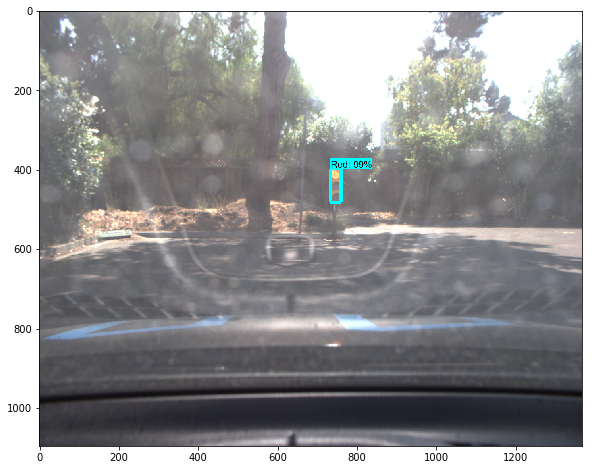

SCORES
[9.9981195e-01 8.3383890e-03 2.3521399e-03 1.2333379e-03 7.5781206e-04
 2.4060132e-04 1.4329891e-04 1.2311964e-04 1.0304676e-04 9.3070194e-05]
CLASSES
[2. 1. 4. 3. 3. 4. 3. 4. 4. 4.]


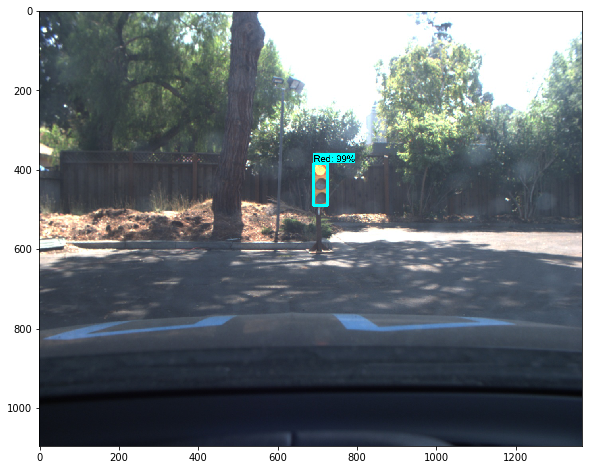

In [13]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
#             print('BOXES')
#             print(boxes)
#             print('NUM')
#             print(num)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

SCORES
[0.9175905  0.6792404  0.62428546 0.59457546 0.31535122 0.30015203
 0.29224807 0.24034888 0.09553158 0.0600158 ]
CLASSES
[1. 3. 1. 1. 2. 3. 3. 3. 2. 3.]


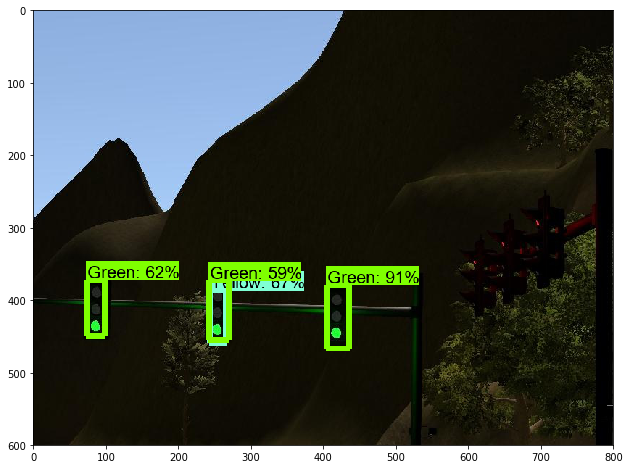

SCORES
[0.8433875  0.45362633 0.34647226 0.185286   0.17726466 0.13047403
 0.0161834  0.00715324 0.00592018 0.00497231]
CLASSES
[3. 3. 1. 2. 2. 1. 4. 4. 4. 4.]


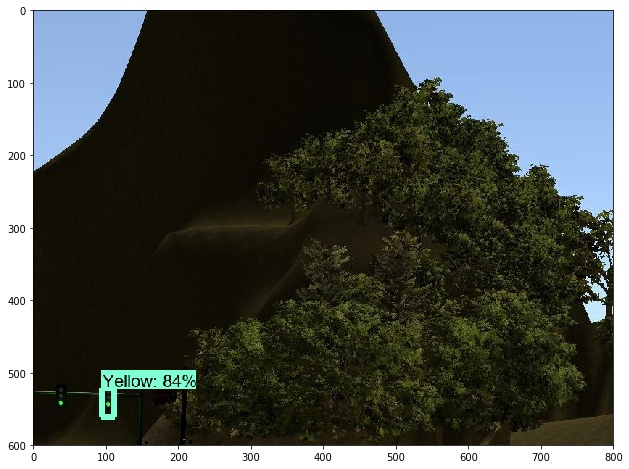

SCORES
[0.99628663 0.99611205 0.9932394  0.0235086  0.02003784 0.01485898
 0.01382613 0.01071916 0.0081175  0.00694038]
CLASSES
[2. 2. 2. 1. 3. 1. 3. 3. 1. 3.]


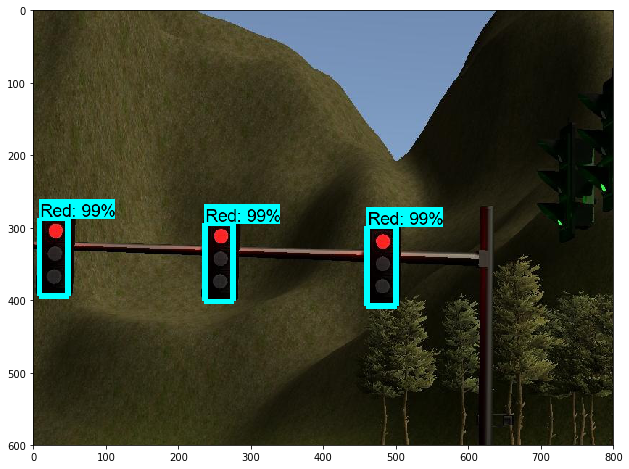

SCORES
[0.7599704  0.7426789  0.7092735  0.58590555 0.53119147 0.20511883
 0.11302713 0.06997674 0.05155491 0.0142574 ]
CLASSES
[1. 1. 1. 3. 3. 3. 2. 2. 2. 4.]


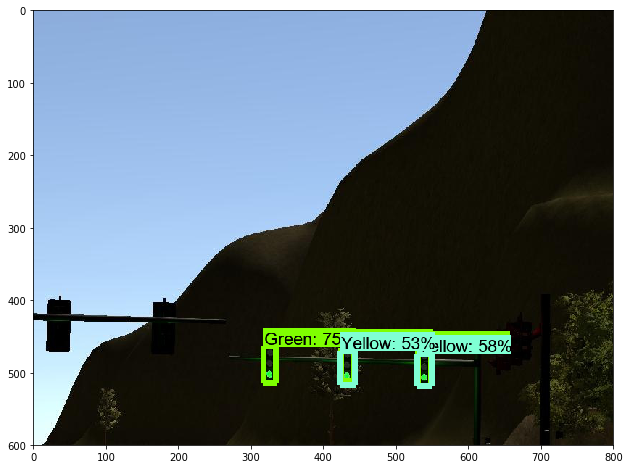

SCORES
[0.76265156 0.7507646  0.6144794  0.5771867  0.5330089  0.2660225
 0.11324771 0.10751661 0.08262595 0.01796954]
CLASSES
[2. 2. 1. 1. 2. 3. 3. 3. 1. 4.]


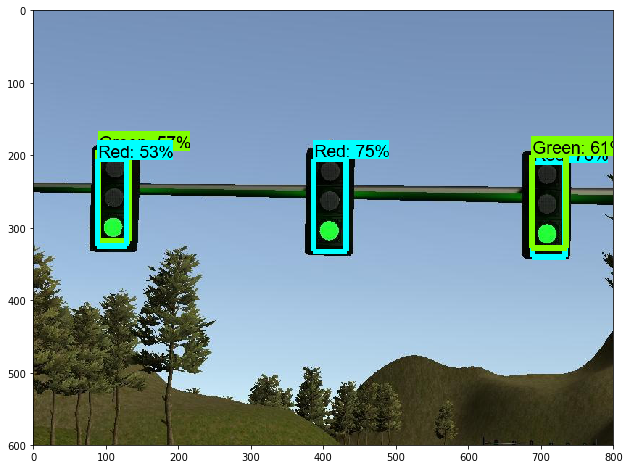

SCORES
[7.9074761e-14 7.3884116e-14 6.1942788e-14 6.1520559e-14 3.9477004e-14
 3.7275054e-14 3.4220585e-14 2.2184542e-14 1.8993260e-14 1.3299908e-14]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


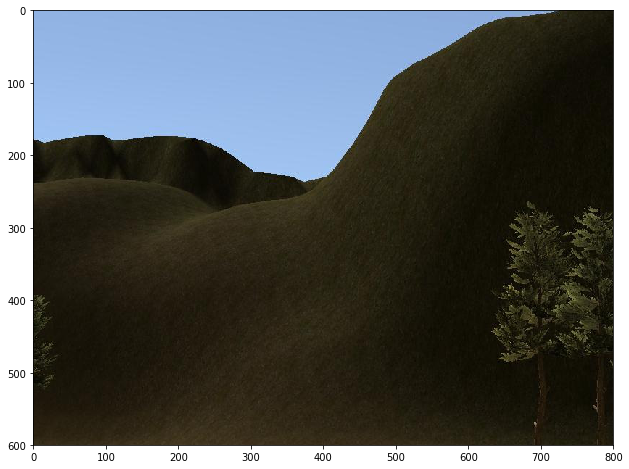

SCORES
[0.8564983  0.65107846 0.5448967  0.23107883 0.22337237 0.21393399
 0.14259054 0.07481005 0.04780823 0.01226917]
CLASSES
[2. 2. 2. 1. 3. 1. 3. 1. 3. 4.]


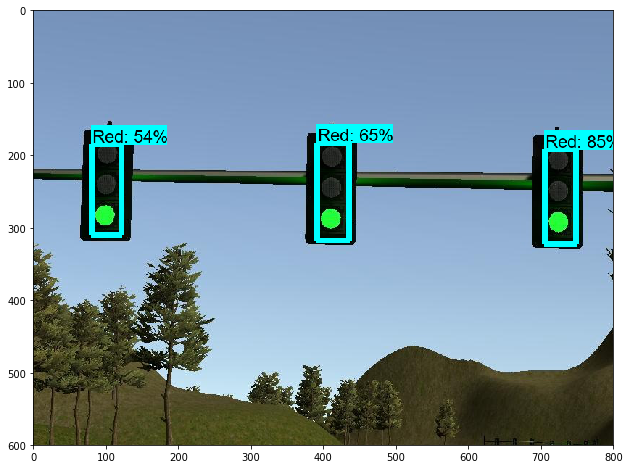

SCORES
[0.99354666 0.988388   0.7972144  0.35843956 0.05093432 0.04522436
 0.02940318 0.02060989 0.01252224 0.01009618]
CLASSES
[2. 2. 2. 1. 3. 1. 1. 3. 3. 4.]


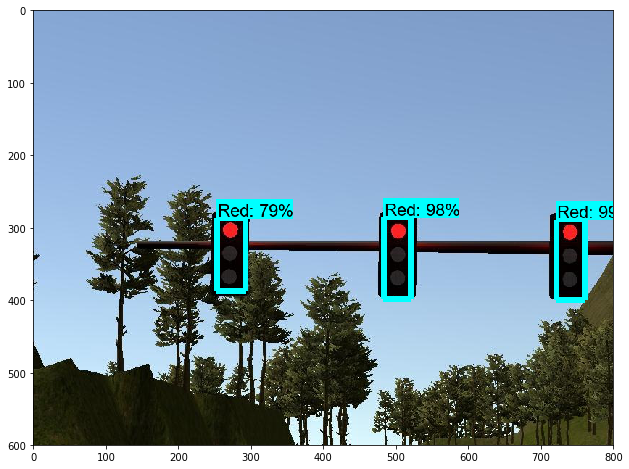

SCORES
[0.8561623  0.8486168  0.7400876  0.5402477  0.52545005 0.42835107
 0.22376043 0.05430883 0.03283698 0.01625691]
CLASSES
[2. 2. 2. 1. 1. 1. 3. 3. 3. 4.]


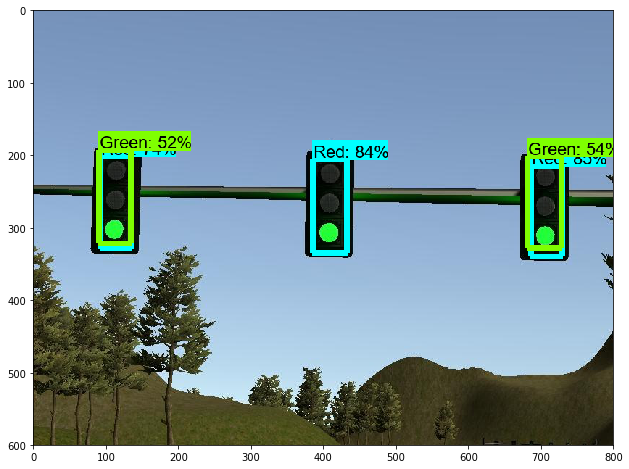

SCORES
[0.9964529  0.99592847 0.9954456  0.03232314 0.02196334 0.01954559
 0.01396536 0.01326815 0.00757054 0.00635693]
CLASSES
[2. 2. 2. 1. 3. 1. 1. 3. 3. 4.]


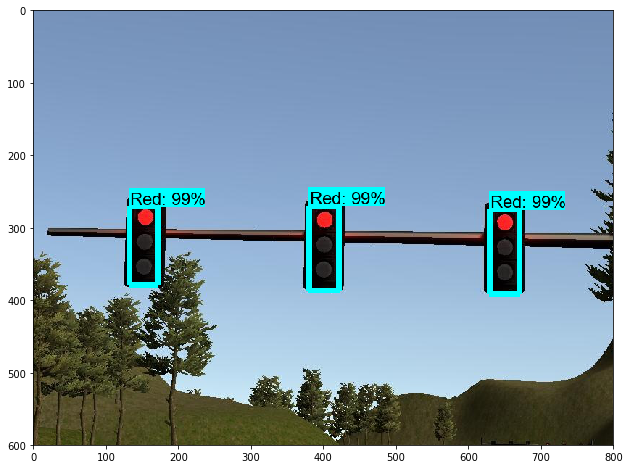

SCORES
[0.0511338  0.04736717 0.02610188 0.0046124  0.00411089 0.00210969
 0.00091531 0.00042415 0.00027256 0.00019099]
CLASSES
[2. 1. 1. 3. 1. 4. 4. 4. 3. 4.]


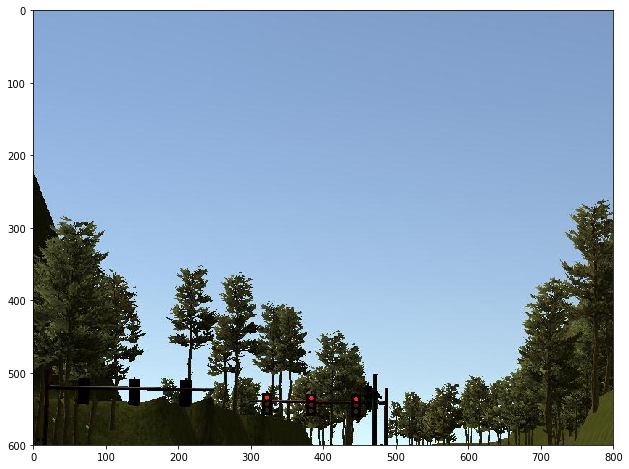

In [14]:
PATH_TO_IMGS = r'data/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
#             print('BOXES')
#             print(boxes)
#             print('NUM')
#             print(num)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break